In [8]:
import sys
sys.path.insert(0, "/Users/labo_dupe/Documents/GitHub/PyImage/utils/")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan, ShiftFit,FinalShiftFit
from HoughLine import show_hough_linetransform, show_ransac_points_line, show_plot, Correlation_plot,show_intensity_plot, Peak_Data
from bokeh.models import Label
from bokeh.io import export_png
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output
from bokeh.models import Range1d
import csv
from GaussFit import MakePath

In [9]:
targetdir = 'F:/Ozge/20190417_colorcorrected_croped/20190302'

Membraneimage = 'F:/Ozge/20190417_colorcorrected_croped/20190302/Ch1LineScan_C2-20190417_1x16_2TrackID1.tif'

Actinimage = 'F:/Ozge/20190417_colorcorrected_croped/20190302/Ch2LineScan_C2-20190417_1x16_2TrackID1.tif'



#Enter time unit in seconds
Time_unit = 5
#Enter pixel to micrometer conversion
Xcalibration = 0.1032
#Enter the number of pixels to be included in the fit
Fitaround= 8


#Symmetric psf as input (micrometers)
psf = 0.17

showaftertime = 100
inisigmaguess =  psf
#Size of linescan
skip = 50
singleblock = 80 

#Number of segments
numsegments = 10
id = []
for i in range(0, numsegments):
    id.append(i)
    
MakePath(targetdir)    
save_dir = targetdir + 'ls_data_block'    
MakePath(save_dir)


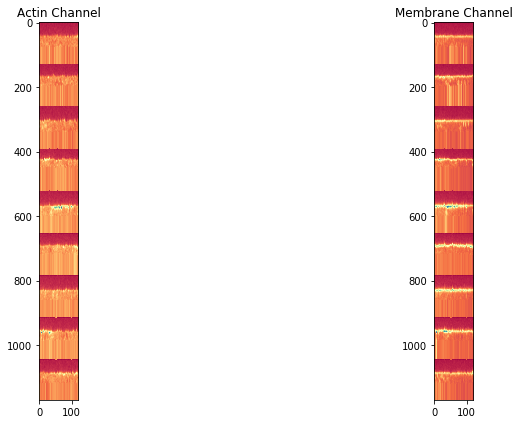

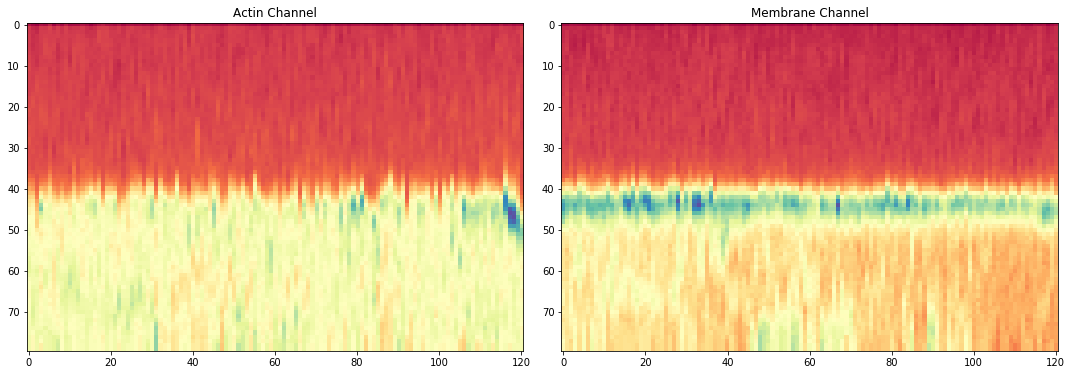

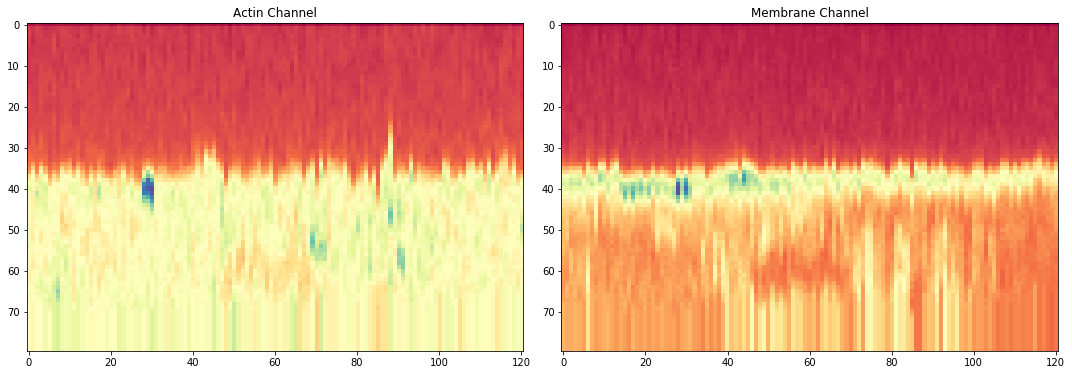

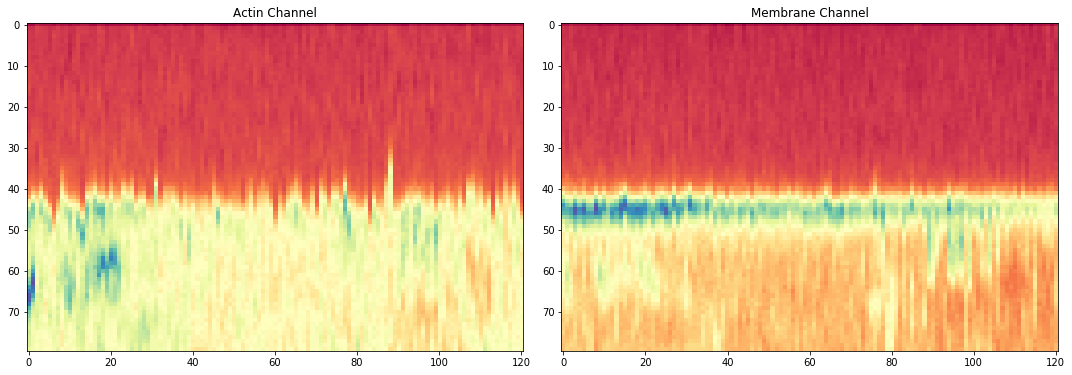

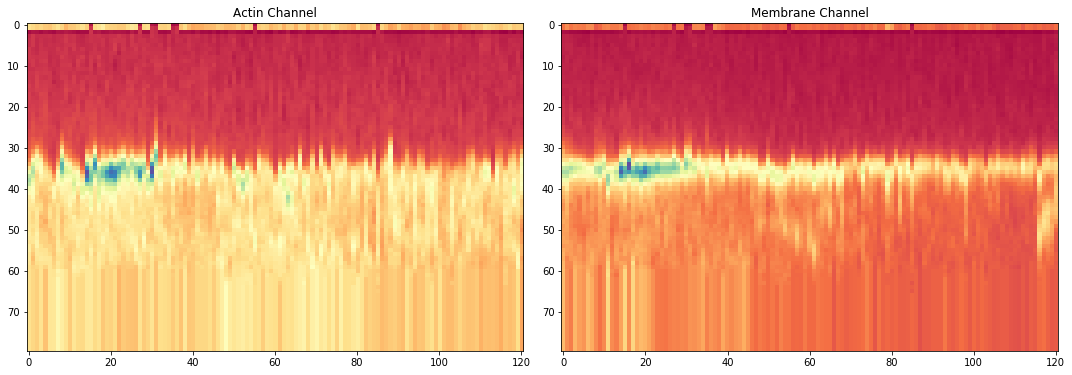

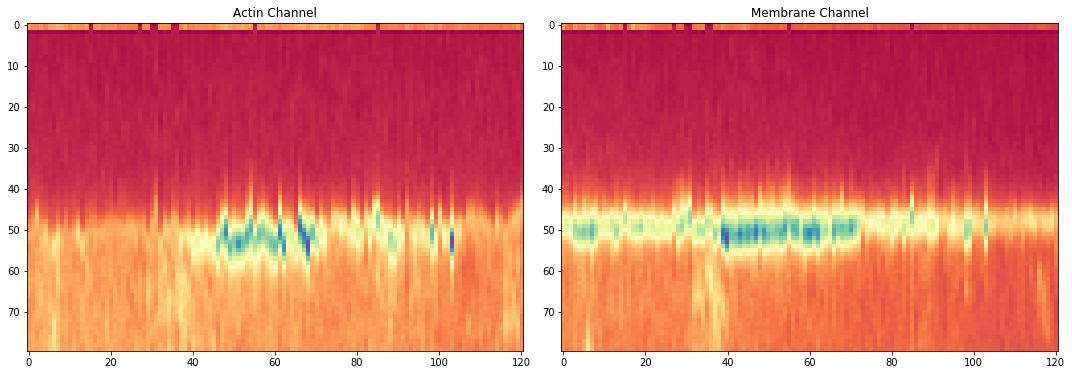

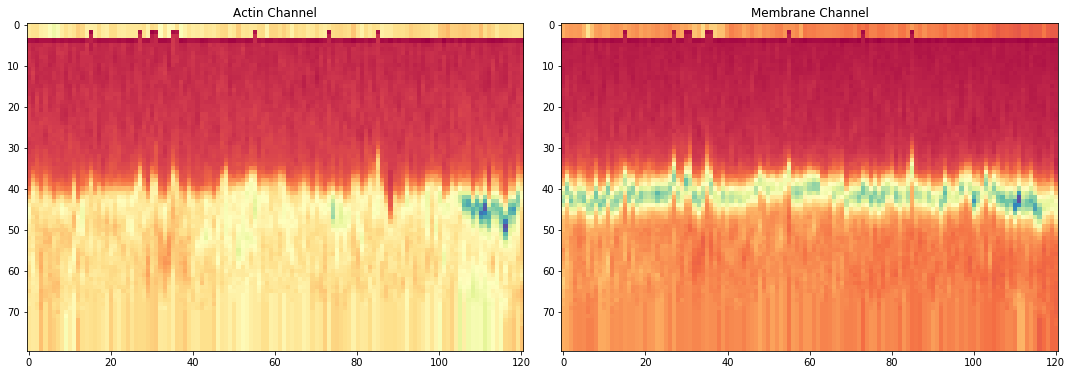

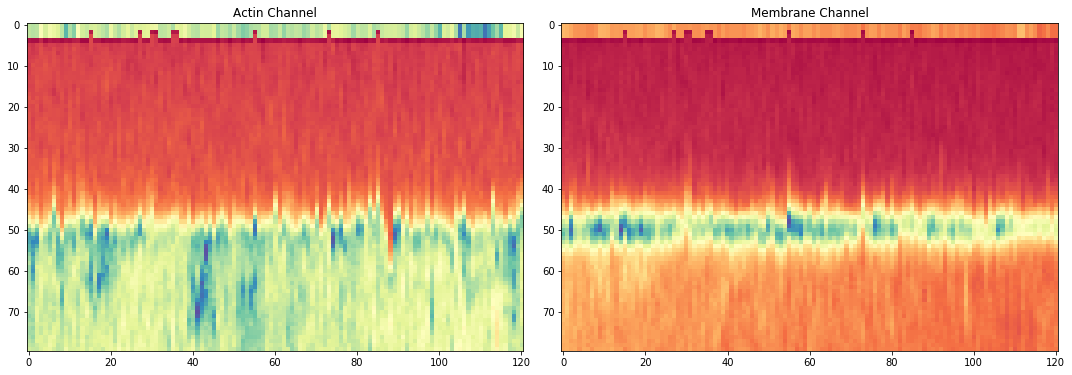

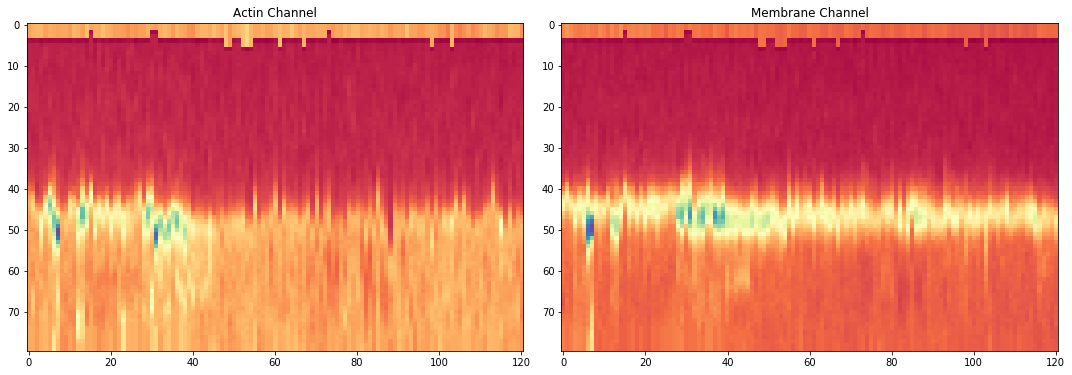

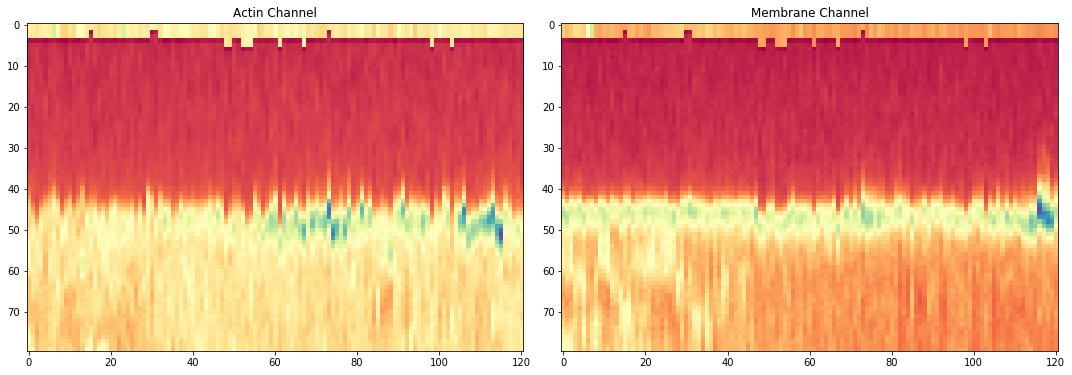

In [10]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)

doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')
blockimageActin = []
blockimageMembrane = []

i = 0
while i < Actin.shape[0]:
       
   blockActin = Actin[i:i + singleblock,:]#/np.amax(Actin[i:i + singleblock,:], 0)
   blockMembrane = Membrane[i:i + singleblock,:]#/np.amax(Membrane[i:i + singleblock,:],0)
   
   blockimageActin.append(blockActin)
   blockimageMembrane.append(blockMembrane)
   doubleplot(blockActin, blockMembrane, 'Actin Channel', 'Membrane Channel')
   i = i + singleblock + skip 

halflength = int(len(blockimageActin)/2)
otherhalf = len(blockimageActin) - halflength
totallength = len(blockimageActin)


block id 1


/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:612: RuntimeWarning: invalid value encountered in true_divide
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])
/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:628: RuntimeWarning: invalid value encountered in true_divide
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])
C:\Users\labo_dupe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\labo_dupe\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


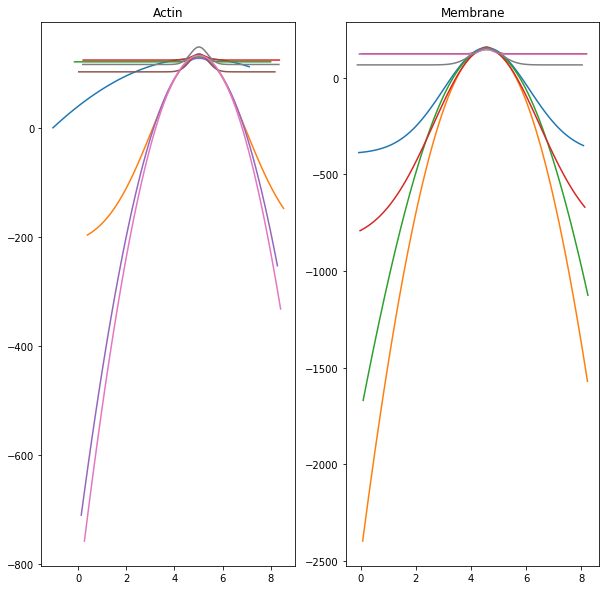

/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:628: RuntimeWarning: invalid value encountered in double_scalars
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])
/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:612: RuntimeWarning: invalid value encountered in double_scalars
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])


Membrane Fit: (Amp, Sigma, PeakPos, C) [ 45.70075578   0.38290762   4.56531656 104.06680235]
Actin Fit: [ 19.69941377   0.42312017   4.87294395 113.08576177]


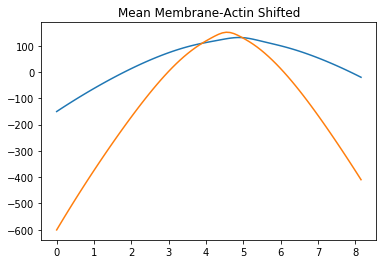

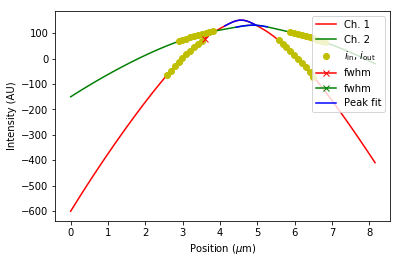

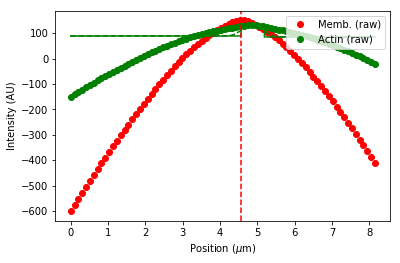

Thickness (nm), center cortex , cortical actin intensity (from fit) 622.6054871146152 4.876619304549786 134.84364748529188


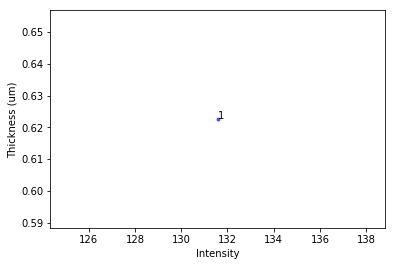

Thickness (min) 622.6054871146152 nm
Thickness (median) 622.6054871146152 nm
Thickness (max) 622.6054871146152 nm
block id 2


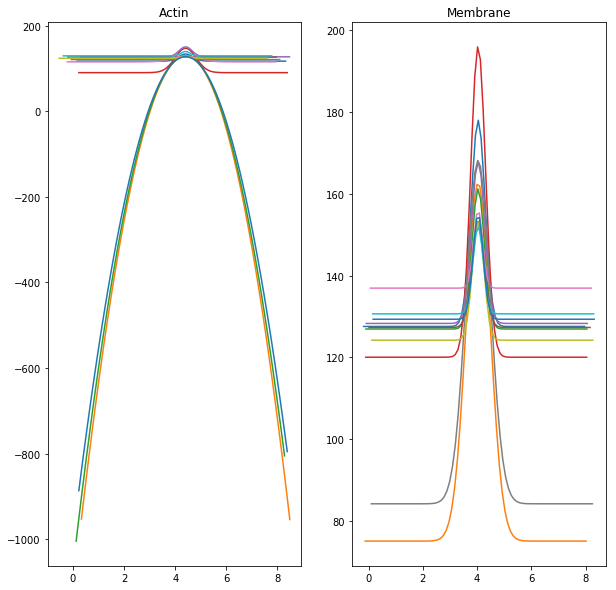

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 32.2281921    0.32009796   4.07182283 119.46016681]
Actin Fit: [ 13.3272492    0.36363674   4.20002855 116.47003489]


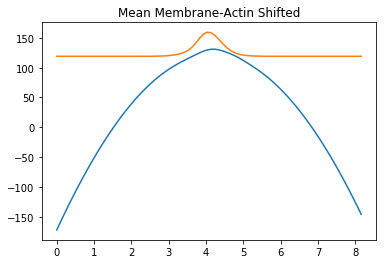

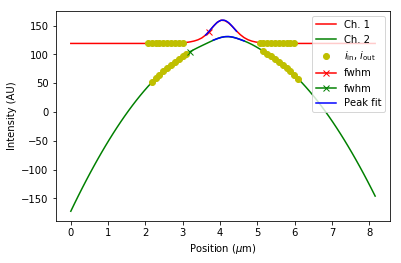

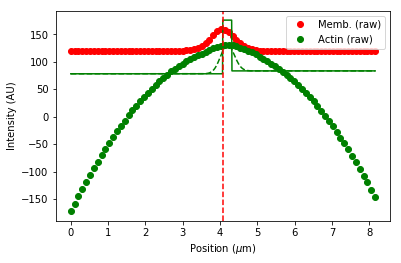

Thickness (nm), center cortex , cortical actin intensity (from fit) 243.22814062424607 4.193436897015608 176.21419289333895


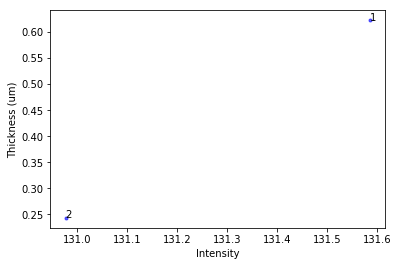

Thickness (min) 243.22814062424607 nm
Thickness (median) 432.91681386943065 nm
Thickness (max) 622.6054871146152 nm
block id 3


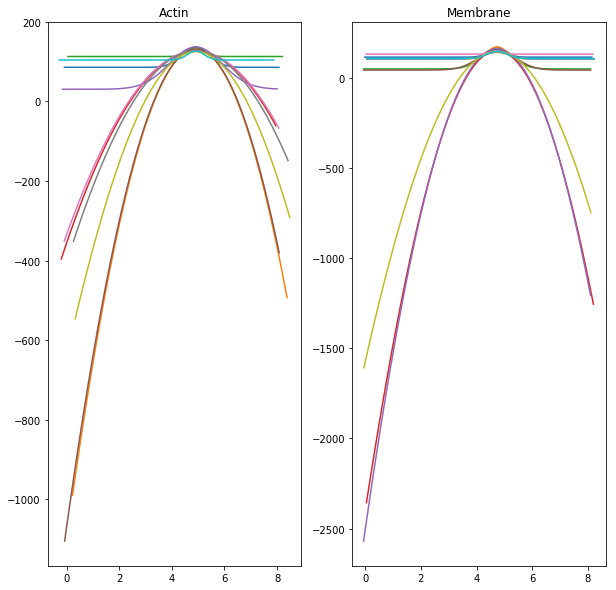

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 52.4964965    0.40211794   4.73827608 101.61305978]
Actin Fit: [ 29.01397423   0.48666172   4.92523431 105.03799941]


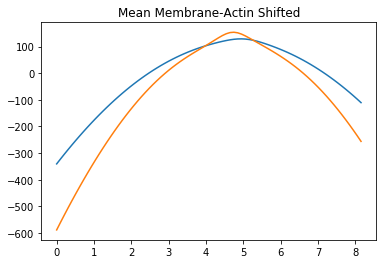

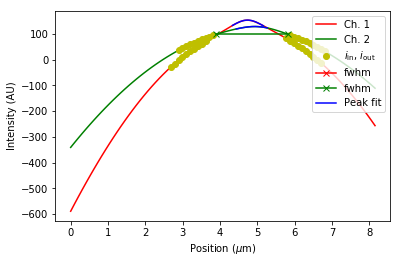

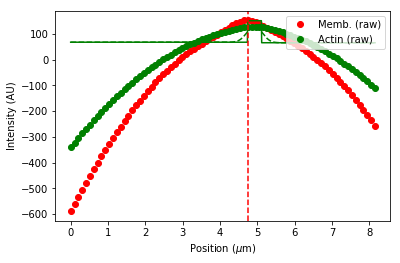

Thickness (nm), center cortex , cortical actin intensity (from fit) 377.54062189905693 4.927046393874953 151.3736736576905


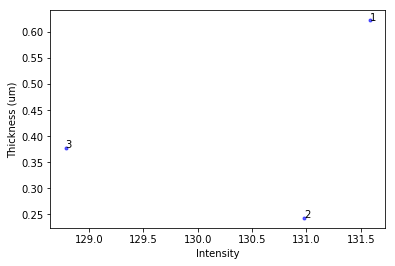

Thickness (min) 243.22814062424607 nm
Thickness (median) 377.54062189905693 nm
Thickness (max) 622.6054871146152 nm
block id 4


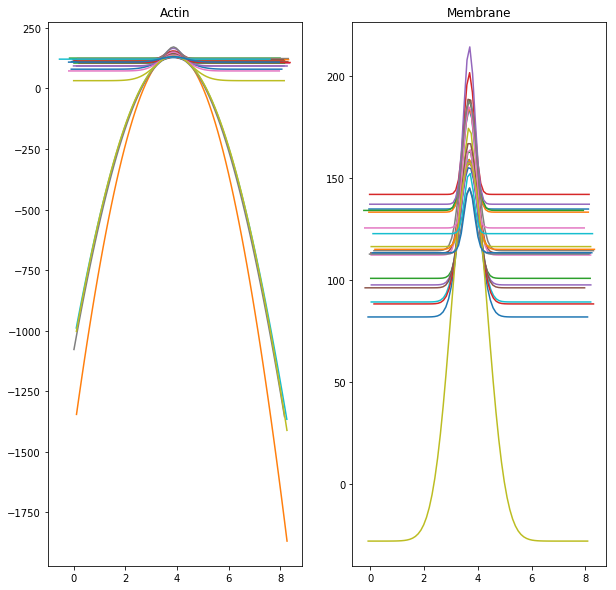

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 32.37039278   0.26173025   3.68489607 117.66025345]
Actin Fit: [ 34.85603226   0.39111853   3.81689782 103.70470061]


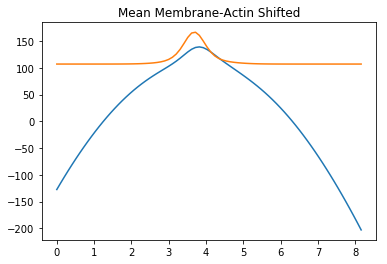

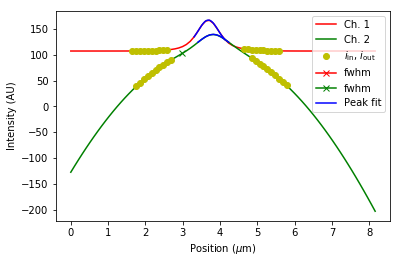

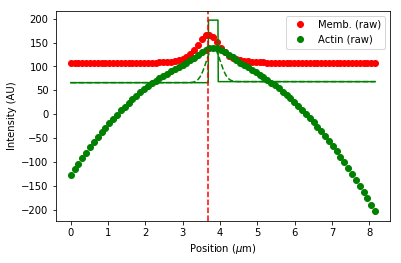

Thickness (nm), center cortex , cortical actin intensity (from fit) 260.2714511115838 3.815031794862201 196.89053064473228


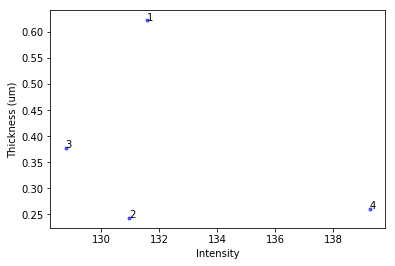

Thickness (min) 243.22814062424607 nm
Thickness (median) 318.90603650532034 nm
Thickness (max) 622.6054871146152 nm
block id 5


C:\Users\labo_dupe\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


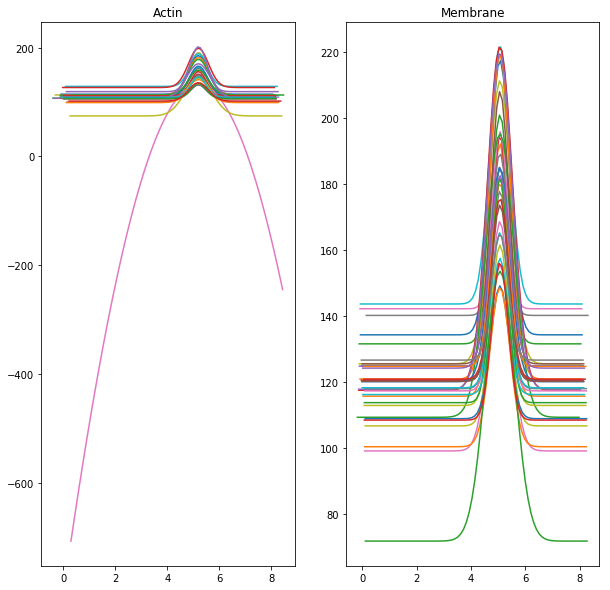

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 54.59992279   0.35104018   5.0701938  120.34756706]
Actin Fit: [ 37.98195904   0.37985484   5.21127446 110.6378894 ]


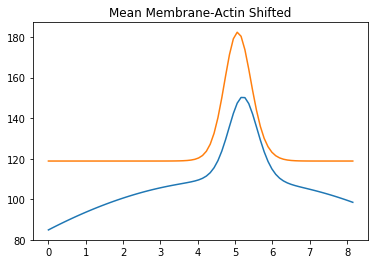

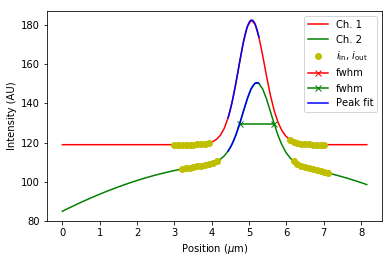

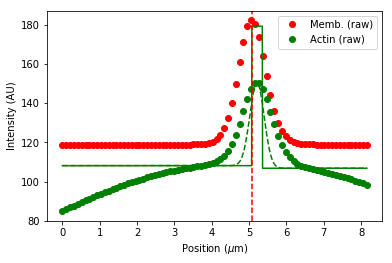

Thickness (nm), center cortex , cortical actin intensity (from fit) 285.891276752698 5.21313943916157 179.2423204144784


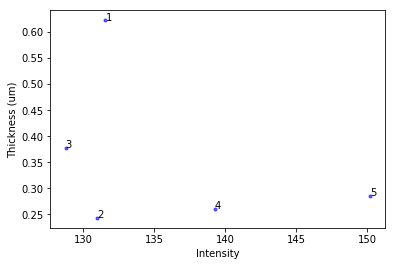

Thickness (min) 243.22814062424607 nm
Thickness (median) 285.891276752698 nm
Thickness (max) 622.6054871146152 nm
block id 6


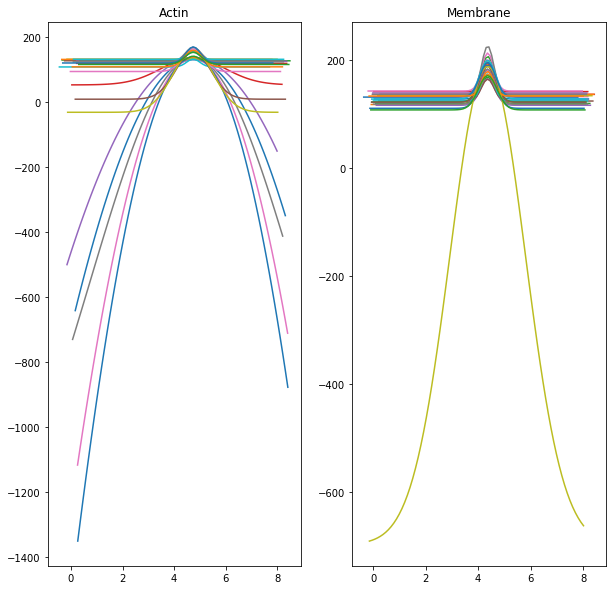

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 47.54571525   0.32055989   4.37922452 121.48569003]
Actin Fit: [155.83318163   0.79244142   4.67465124  62.58953309]


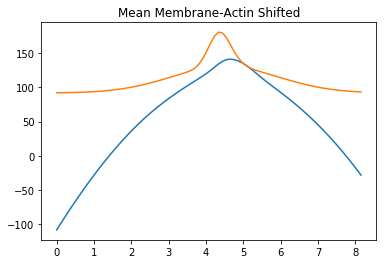

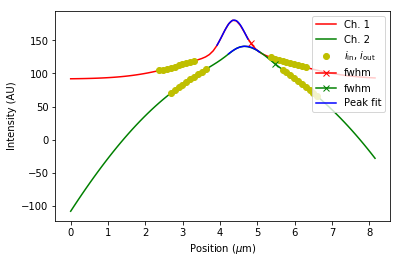

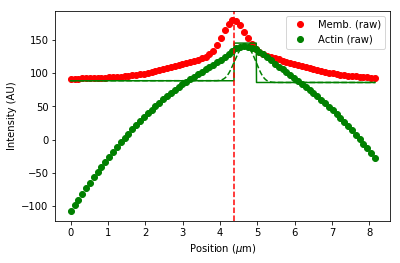

Thickness (nm), center cortex , cortical actin intensity (from fit) 595.2087851255471 4.676828916812876 145.69483803601207


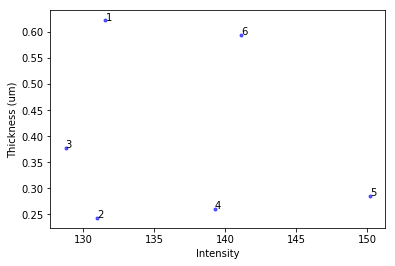

Thickness (min) 243.22814062424607 nm
Thickness (median) 331.71594932587743 nm
Thickness (max) 622.6054871146152 nm
block id 7


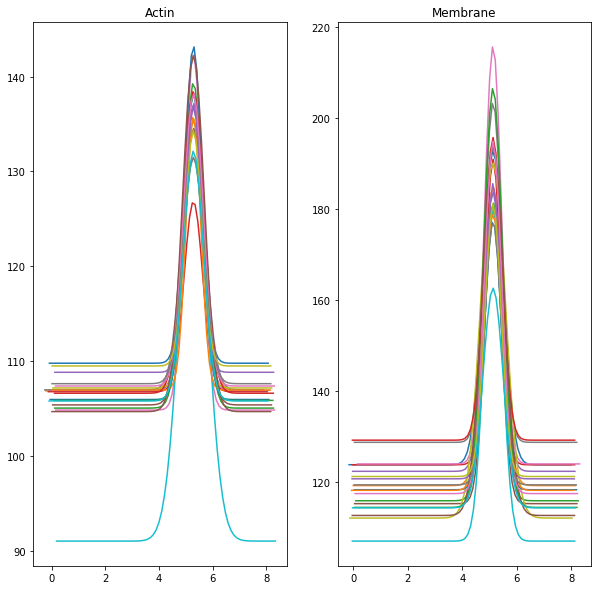

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 56.48274548   0.33566681   5.12205653 119.34081686]
Actin Fit: [ 26.21860671   0.37006743   5.26974671 106.72440919]


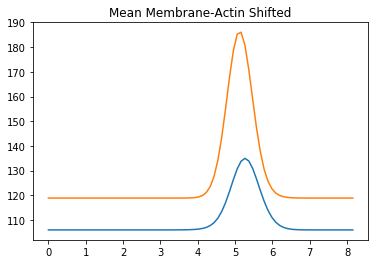

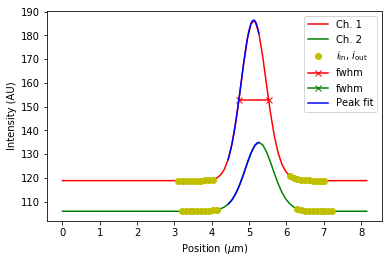

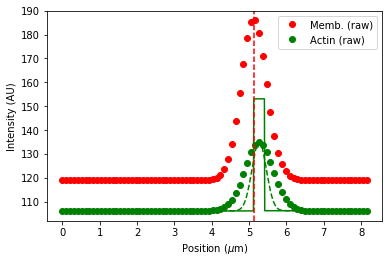

Thickness (nm), center cortex , cortical actin intensity (from fit) 295.05993839806956 5.26958650331366 153.06247723885923


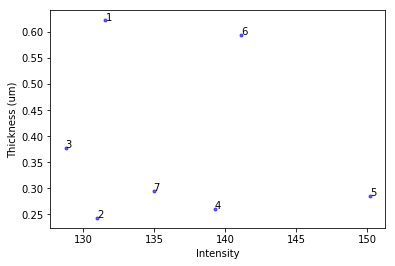

Thickness (min) 243.22814062424607 nm
Thickness (median) 295.05993839806956 nm
Thickness (max) 622.6054871146152 nm
block id 8


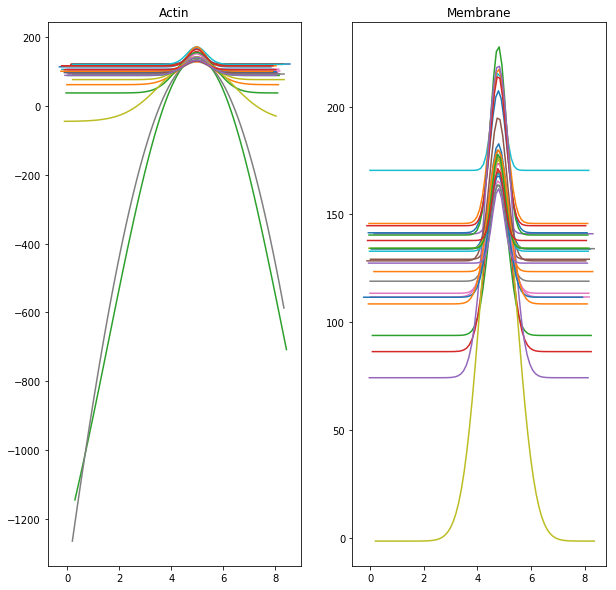

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 39.27250002   0.30965309   4.78328122 130.70954515]
Actin Fit: [ 44.51974394   0.46934847   4.97183697 103.33469813]


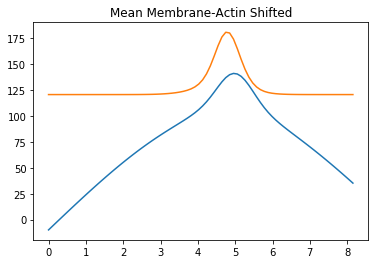

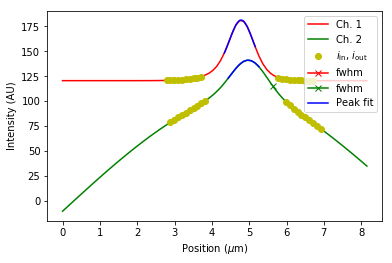

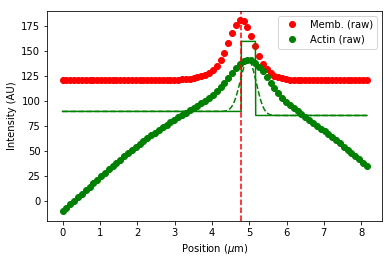

Thickness (nm), center cortex , cortical actin intensity (from fit) 385.50247004655193 4.976032454045159 159.65620020360154


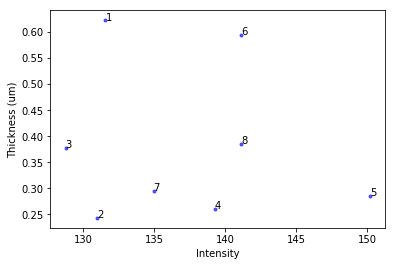

Thickness (min) 243.22814062424607 nm
Thickness (median) 336.3002801485632 nm
Thickness (max) 622.6054871146152 nm
block id 9


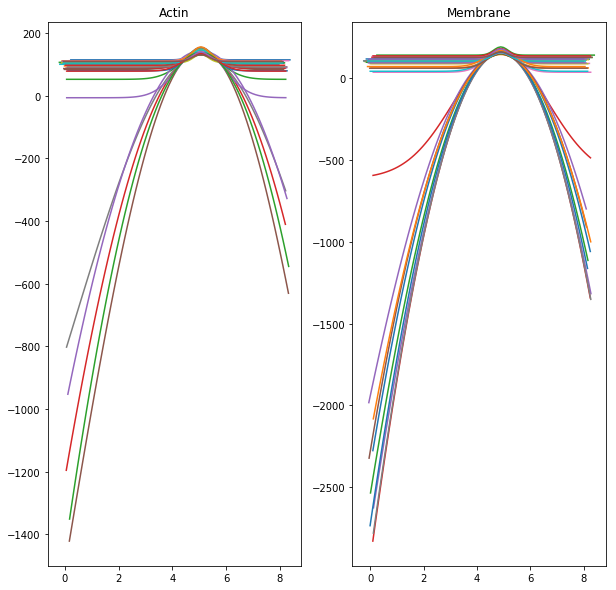

Membrane Fit: (Amp, Sigma, PeakPos, C) [60.27433767  0.43385236  4.89348317 98.79258757]
Actin Fit: [ 35.89270389   0.42187433   5.07373167 104.4300291 ]


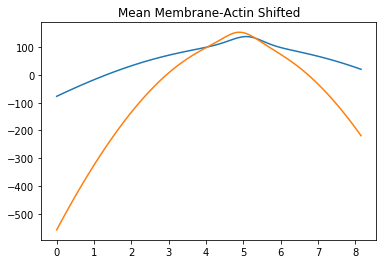

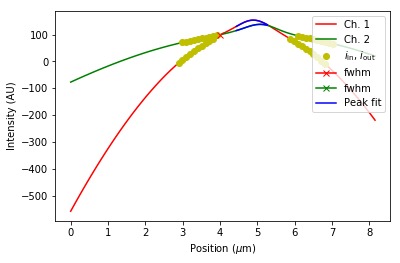

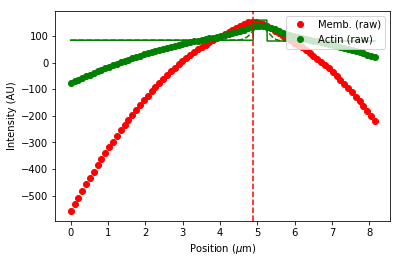

Thickness (nm), center cortex , cortical actin intensity (from fit) 366.73435676078503 5.076850350557567 159.98038059093005


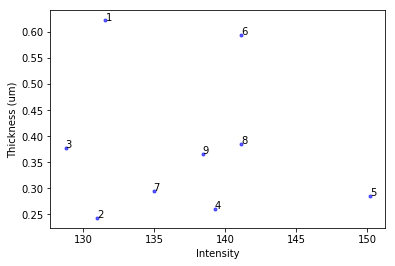

Thickness (min) 243.22814062424607 nm
Thickness (median) 366.73435676078503 nm
Thickness (max) 622.6054871146152 nm
Wall time: 5min 21s


In [11]:
%%time
global Thickness, Intensity, PeakActin, DataActin, PeakMembrane, DataMembrane, Time, ID, BlockAverageActin, BlockAverageMembrane
global Thickness_intensity, Thickness_id
#Fit all blocks

Thickness = []
Intensity = []
PeakActin = []
DataActin = []
PeakMembrane = []
DataMembrane = []
Time = []
ID = []

BlockAverageActin = []
BlockAverageMembrane = []
for i in range(0, totallength):
    
 BlockActin = []
 BlockMembrane = []
    
 print('block id', i+1) 
 currentid = i+1
 ID.append(i + 1)
 Actin = blockimageActin[i]
 Membrane = blockimageMembrane[i]
 
 StripFit(Membrane, Actin, Time_unit, Xcalibration, Fitaround, psf, inisigmaguess, showaftertime, Thickness, Intensity, PeakActin, BlockActin, PeakMembrane, BlockMembrane, BlockAverageActin,BlockAverageMembrane, Time, 0)
 Correlation_plot(Thickness, Intensity, ID)
 
 print("Thickness (min)",np.min(Thickness) *1000, "nm")
 print("Thickness (median)",np.median(Thickness) *1000, "nm")
 print("Thickness (max)",np.max(Thickness) *1000, "nm")
 
 Thickness_intensity = np.column_stack([Thickness, Intensity]) 
 
 Thickness_id = np.column_stack([Thickness, ID]) 
 

 #clear_output(wait = True)
    


In [12]:

master_data= []

Path(save_dir).mkdir(exist_ok = True)

for line in Thickness_id:
    master_data.append(line)
file =    open(save_dir + "/" + ( "Block" + os.path.basename(Actinimage))  +".csv", "w")
writer = csv.writer(file)
writer.writerows(master_data) 
file.close()


X: 142.03522679087996 Y:  0.3787216679594332
Standard deviation: 66.75577233214936
X: 131.57909929858977 Y:  0.38460854700899694
Standard deviation: 66.75577233214936


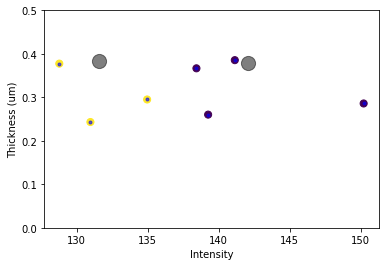

/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:628: RuntimeWarning: invalid value encountered in double_scalars
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])
/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:612: RuntimeWarning: invalid value encountered in double_scalars
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])


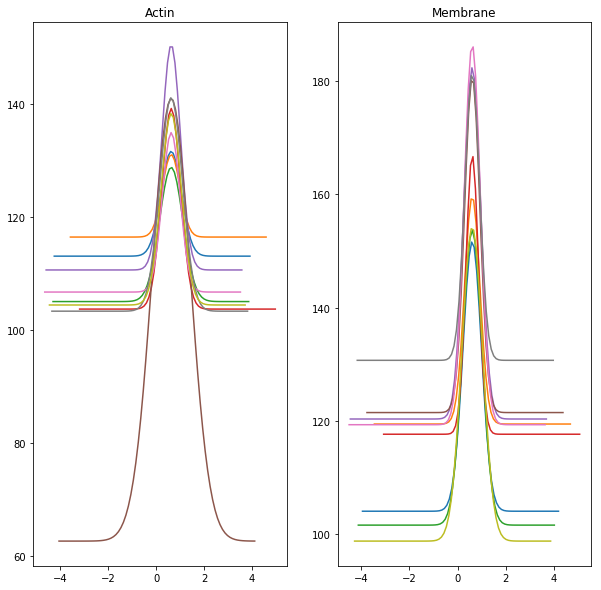

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 2.88308526e+03  2.13851185e+00  8.26371259e-01 -3.88396989e+02]
Actin Fit: [ 11.14474412   0.36107615   0.88162226 117.50879123]


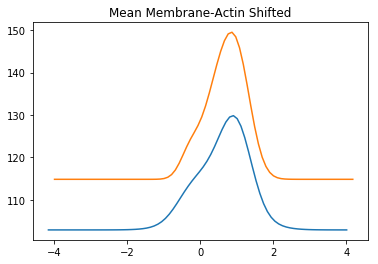

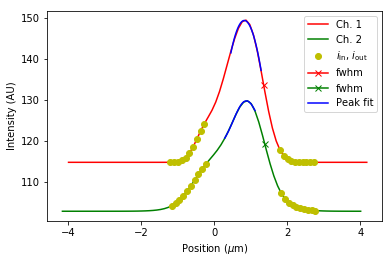

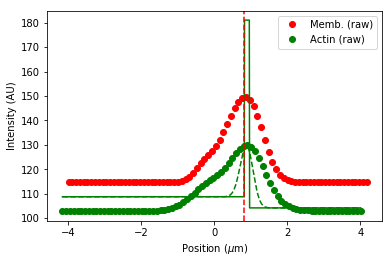

Thickness (nm), center cortex , cortical actin intensity (from fit) 136.39391927489433 0.8945682181856465 181.04288105459807


In [13]:
num_clusters = 2
show_intensity_plot(Thickness_intensity,save_dir,os.path.basename(Actinimage), ymin = 0, ymax = 0.5, num_clusters = num_clusters )



FinalThickness = []
FinalIntensity = []
FinalTime = []
FinalShiftFit(BlockAverageActin, BlockAverageMembrane, Time_unit, Xcalibration, Fitaround
             , psf, inisigmaguess, showaftertime,FinalThickness, FinalIntensity,   FinalTime, 0)

Final_master_data= []
Final_Thickness = np.column_stack([FinalThickness, os.path.basename(Actinimage)]) 


for line in Final_Thickness:
    Final_master_data.append(line)
Final_file =    open(save_dir + "/" + ( "Master" + os.path.basename(Actinimage))  +".csv", "w")
writer = csv.writer(Final_file)
writer.writerows(Final_master_data) 
Final_file.close()



In [14]:
hist, edges = np.histogram((Thickness), density=False, bins='auto')
p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)')
listedges = edges.tolist()
listhist = hist.tolist()
output_notebook()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
show(p)    
export_png(p, filename=save_dir +  "/" +  'Bokeh_Histogram' + os.path.basename(Actinimage) + '.png')    

Loading BokehJS ...

'F:\\Ozge\\20190417_colorcorrected_croped\\20190302ls_data_block\\Bokeh_HistogramCh2LineScan_C2-20190417_1x16_2TrackID1.tif.png'